In [1]:
import tensorflow as tf
from keras import datasets
from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D,Flatten
import matplotlib.pyplot  as plt
%matplotlib widget

In [12]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 35s 0us/step


In [13]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [16]:
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [2]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [21]:
train_labels[0]

array([6], dtype=uint8)

In [28]:
class_names[train_labels[4][0]]

'automobile'

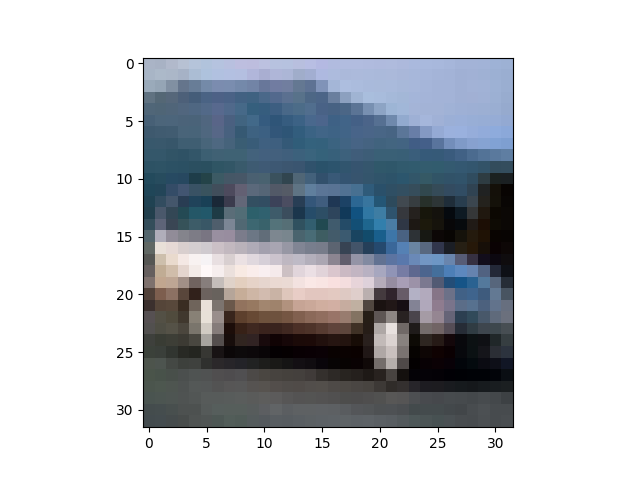

In [27]:
plt.close()
plt.imshow(train_images[4])
plt.show()

In [3]:
model = Sequential()
model.add(Conv2D(32 , kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [4]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [36]:
h= model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.5033 - accuracy: 0.4511 - val_loss: 1.2106 - val_accuracy: 0.5637
Epoch 2/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.1292 - accuracy: 0.5988 - val_loss: 1.0855 - val_accuracy: 0.6235
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9790 - accuracy: 0.6561 - val_loss: 0.9918 - val_accuracy: 0.6539
Epoch 4/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8710 - accuracy: 0.6926 - val_loss: 0.9503 - val_accuracy: 0.6730
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8032 - accuracy: 0.7186 - val_loss: 0.8997 - val_accuracy: 0.6888
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7444 - accuracy: 0.7406 - val_loss: 0.8629 - val_accuracy: 0.7041
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6891 - accuracy: 0.7580 - val_loss: 0.8609 -

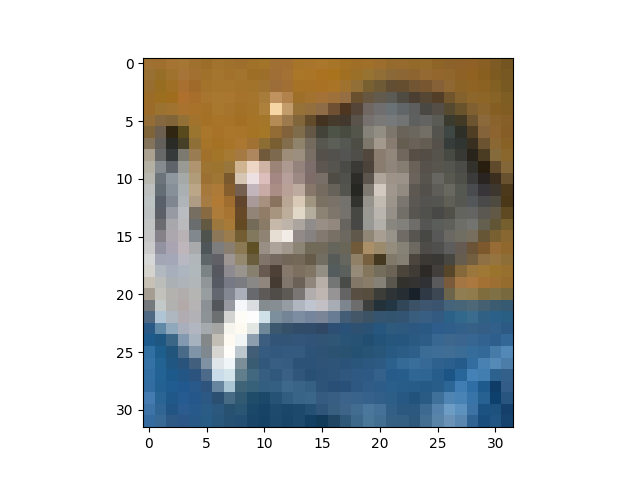

In [52]:
plt.close()

plt.imshow(test_images[0])

plt.show()

In [51]:
print(class_names[test_labels[0][0]])

cat


In [48]:
out= model.predict(test_images)

313/313 [==============================] - 2s 7ms/step


In [53]:
out[0]

array([-3.6811807 , -0.39648506, -1.3484143 ,  3.0969234 , -0.23800355,
        3.064763  ,  0.40610492, -1.1811224 , -0.88638926, -1.562501  ],
      dtype=float32)

In [54]:
m=-1000
o2=out[0]
ind=-1

for i in range(len(o2)):
    if o2[i]>m:
        m=o2[i]
        ind=i


print(class_names[ind])

cat


In [ ]:
import cv2


img=cv2.imread('your-photo.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(32,32))

print(img.shape)

(32, 32, 3)


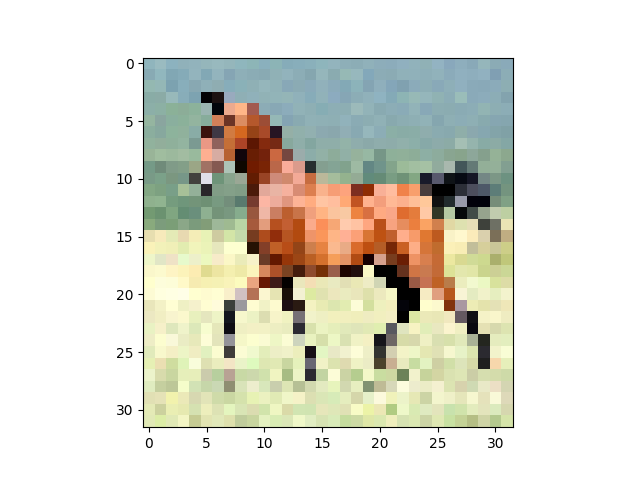

In [59]:
plt.close()

plt.imshow(img)

plt.show()

In [62]:
import numpy as np

img= np.array([img])

In [63]:
img.shape


(1, 32, 32, 3)

In [64]:
out2= model.predict(img)

1/1 [==============================] - 0s 129ms/step


In [66]:
m=-1000
o2=out2[0]
ind=-1

for i in range(len(o2)):
    if o2[i]>m:
        m=o2[i]
        ind=i


print(class_names[ind])

horse


In [73]:
model.save('model.h5')

In [ ]:
import cv2
import numpy as np


model.load_weights('model.h5')


img=cv2.imread('your-photo.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(32,32))



img= np.array([img])

out2= model.predict(img)

m=-1000
o2=out2[0]
ind=-1

for i in range(len(o2)):
    if o2[i]>m:
        m=o2[i]
        ind=i


print(class_names[ind])

1/1 [==============================] - 0s 115ms/step
bird
